In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn

In [2]:
## Load Data

In [22]:
df = pd.read_csv("airline-passengers.csv")

## Fit data

In [23]:
#df['year'] = np.array(df['Month'].apply(lambda x: x.split('-')[0]))
#df['month'] = np.array(df['Month'].apply(lambda x: x.split('-')[1]))

In [136]:
#df

In [137]:
#plt.plot(df['Passengers'].astype(float))
#plt.show()

In [138]:
## Make fake data

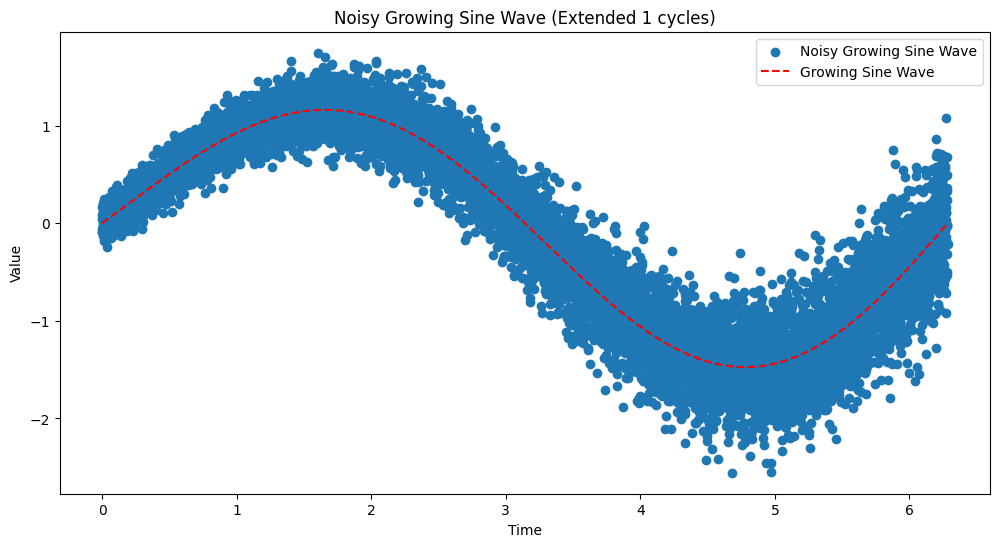

In [232]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math

# Function to generate a growing sine wave with increasing noise
def generate_extended_sine_wave(N, num_points_per_cycle=1000):
    # Generate time for each cycle, repeating the sine wave N times
    t = torch.linspace(0, 2 * np.pi, num_points_per_cycle)  # One cycle of sine wave
    t_extended = torch.cat([t + 2 * np.pi * i for i in range(N)])  # Extend time for N cycles

    # Generate the growing sine wave with increasing amplitude
    A = 1 + 0.1 * t_extended  # Linear growth factor
    signal = A * torch.sin(t_extended)

    # Generate increasing noise
    noise_std = 0.1 + 0.05 * t_extended  # Noise standard deviation grows over time
    noise = torch.normal(mean=torch.zeros_like(t_extended), std=noise_std)

    # Combine signal and noise
    data = signal + noise
    return t_extended, data, signal

# Parameters
N = 1  # Number of cycles to repeat the sine wave
num_points_per_cycle = 10000  # Number of points per cycle

# Generate the extended sine wave data
t_extended, data, signal = generate_extended_sine_wave(N, num_points_per_cycle)
# Plot the data
plt.figure(figsize=(12, 6))
plt.scatter(t_extended.numpy(), data.numpy(), label="Noisy Growing Sine Wave")
plt.plot(t_extended.numpy(), signal.numpy(), label="Growing Sine Wave", linestyle='--', color='red')
plt.legend()
plt.title(f"Noisy Growing Sine Wave (Extended {N} cycles)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [245]:
t_extended = t_extended.reshape(-1,1)
data = data.reshape(-1,1)

x_tensor = t_extended.float().view(-1, 1)
y_tensor = data.float().view(-1, 1)

In [246]:
x_tensor.shape, y_tensor.shape

(torch.Size([10000, 1]), torch.Size([10000, 1]))

## Concept
`f(x) ~ p1 * (x / m) + (p2 * x % m)`

where x is the datatime index (can also be timestamp_i - timestamp_epoch)

In [256]:

from torch.autograd import Variable
import torch
import torch.optim as optim

class Optimizer(nn.Module):
    def __init__(self):
        super().__init__()

        self.m = nn.Parameter(torch.randn(1), )
        self.p1 = nn.Parameter(torch.randn(1))
        self.p2 = nn.Parameter(torch.randn(1))
        self.b = nn.Parameter(torch.randn(1))
        

    def forward(self, x):
        p1 = torch.relu(self.p1)
        p2 = torch.relu(self.p2)
        m = torch.relu(self.m)
        b = torch.relu(self.b)
        #value = p1 * (x / m) * 
        value = (p2 * (x % m))  + b
        return value
    
class SinCurveFitter(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 128)
        self.hidden2 = nn.Linear(128, 256)
        self.hidden3 = nn.Linear(256, 128)
        self.output = nn.Linear(128, 1)
  
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.relu(self.hidden2(x))
        x = torch.relu(self.hidden3(x))
        x = self.output(x)
        return x



In [257]:
model = SinCurveFitter().to('cpu')
print(model)


optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.00)

SinCurveFitter(
  (hidden): Linear(in_features=1, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (hidden3): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=1, bias=True)
)


In [259]:
# Loss function (MSE)
criterion = nn.MSELoss()

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    #model.train()

    # Forward pass: get model predictions
    predictions = model(x_tensor)
    
    # Compute the loss
    loss = criterion(predictions, y_tensor)

    # Backward pass: compute gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/500], Loss: 0.0746
Epoch [200/500], Loss: 0.0753
Epoch [300/500], Loss: 0.0751
Epoch [400/500], Loss: 0.0761
Epoch [500/500], Loss: 0.0744


In [260]:
with torch.no_grad():
    y_pred = model(t_extended)

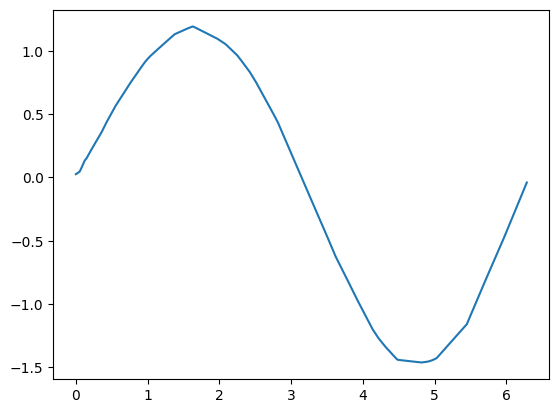

In [261]:
plt.plot(t_extended, y_pred)
plt.show()